# **Beginners Need A Small End-to-End Project**

Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

**I have spent a lot of time on this assignment, researching about each and every single function and how to do things in a different way. I looked through websites like geeksforgeeks and w3schools, and many such websites. I am citing it early on, instead of doing this for each and every code block**

What are those well known steps?



**Answer:**



1.   Collecting data
2.   Cleaning the data and preparing it
3.   Training the model
4.   Making predictions using the model and evaluating it
5.   Improving the model or Finetuning it



**Topics/Features**

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started
* We are going to visualize the data set here
* And make some predictions

**NOTE: for certain activities I will be asking you to do certain things that I feel like you should know how to do**

# **Beginning of Project**

In [2]:
#Please import the following libraries and check the versions of the libraries
#sys
#scipy
#numpy
#matplotlib
#pandas
#sklearn

import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

# Print the versions of the libraries
print("Python:", sys.version)
print("SciPy:", scipy.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)


Python: 3.11.3 (main, Jan 18 2024, 19:07:12) [Clang 18.0.0 (https://github.com/llvm/llvm-project 75501f53624de92aafce2f1da698
SciPy: 1.11.2
NumPy: 1.26.1
Matplotlib: 3.5.2
Pandas: 1.5.3
Scikit-learn: 1.3.1


In [24]:
#Please Import the following modules from your libraries
#You will be required to know which from where

# read_csv is part of pandas, so no need to import it separately

# scatter_matrix
from pandas.plotting import scatter_matrix
"""scatter_matrix is used for plotting scatter matrix plots.
    Extra info about scatter matrix I have researched about is that if you have a DataFrame with 
multiple numerical columns, you can use scatter_matrix to quickly generate a grid of scatter plots for each pair
of columns. It's a powerful tool for exploratory data analysis (EDA) and can help you gain understand data quickly
"""
# pyplot
import matplotlib.pyplot as plt
# pyplot from matplotlib is used for creating a wide range of static, animated, and interactive plots in Python.

# train_test_split
from sklearn.model_selection import train_test_split, KFold
# train_test_split is used to split the dataset into training and testing sets.

# cross_val_score
from sklearn.model_selection import cross_val_score
# cross_val_score is used to evaluate a score by cross-validation.

# StratifiedKFold
from sklearn.model_selection import StratifiedKFold
"""StratifiedKFold is used for splitting the data into k folds, ensuring that each fold is 
representative of the whole dataset."""

# classification_report
from sklearn.metrics import classification_report
# classification_report is used to generate a report showing the main classification metrics.

# confusion_matrix
from sklearn.metrics import confusion_matrix
# confusion_matrix is used to compute confusion matrix to evaluate the accuracy of a classification.

# accuracy_score
from sklearn.metrics import accuracy_score
# accuracy_score is used to calculate the accuracy classification score.

# LogisticRegression
from sklearn.linear_model import LogisticRegression
# LogisticRegression is a linear model for binary classification.

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier is a decision tree classifier.

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier is a k-nearest neighbors classifier.

# LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
"""LinearDiscriminantAnalysis is a classifier with a linear decision boundary, generated by fitting class
conditional densities to the data."""

# GaussianNB
from sklearn.naive_bayes import GaussianNB
# GaussianNB is a Gaussian Naive Bayes classifier.

# SVC
from sklearn.svm import SVC
# SVC is a support vector classifier.


In [4]:
# # load dataset with this url
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# # using this names list
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# dataset = pd.read_csv(url, names=names)
'''I think there is an issue with the firewall or something like that. After discussion in class, I am using this 
method, as it is working for me'''
import requests
from io import StringIO
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(StringIO(requests.get(url).text), names=names)




/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
# print shape of data
print("Shape of the data:")
print(df.shape)

Shape of the data:
(150, 5)


In [6]:
# print first 20 rows of data
print(df[:20])


    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
# print description of data
print("Description of the data:")
print(df.describe())

Description of the data:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# group data by "class"
grouped = df.groupby('class')
grouped.first()
#Here I am checking if the class is grouped by accessing the class


,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-versicolor,7.0,3.2,4.7,1.4
Iris-virginica,6.3,3.3,6.0,2.5


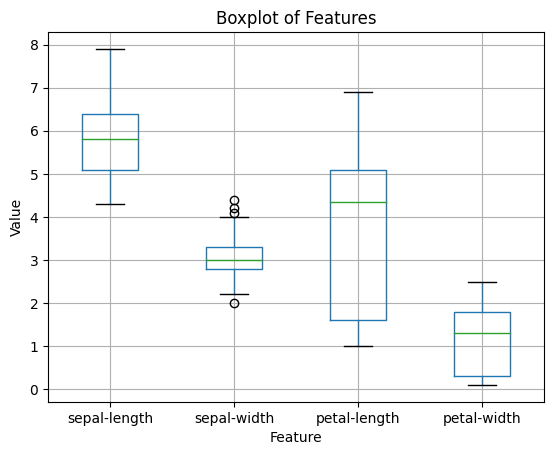

In [31]:
# create a box and whisket plot for the data
# iris_df.plot(kind='box', title="boxplot")
# figure, subplots = pyplot.subplots(4, 1)
# for subplot, name in zip(subplots, names):
#     subplot.boxplot(data[name], vert=False)
#     subplot.set_title(name.title().replace("-", " "))
#     subplot.yaxis.set_ticks([])
# figure.tight_layout()

# figure.show()
# plt.boxplot(df)
# plt.show()
# These are all classmates way of doing the same problem, I have tried them all, and at last I figured out my way was simple to do.

df.boxplot()
plt.title('Boxplot of Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

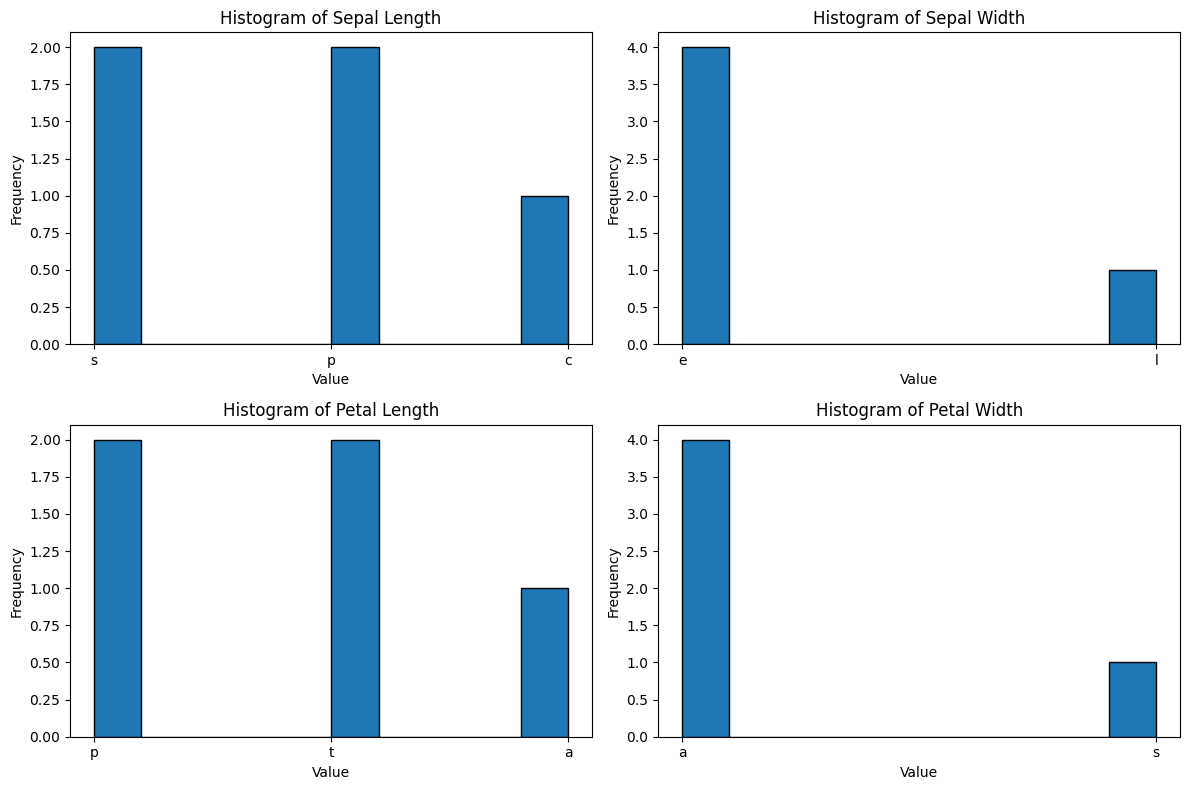

In [16]:
# create a histogram of the data
sepal_length = [row[0] for row in df]
sepal_width = [row[1] for row in df]
petal_length = [row[2] for row in df]
petal_width = [row[3] for row in df]

# Plotting histograms for each feature
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

plt.subplot(2, 2, 1)
plt.hist(sepal_length, bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(sepal_width, bins=10, edgecolor='black')
plt.title('Histogram of Sepal Width')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(petal_length, bins=10, edgecolor='black')
plt.title('Histogram of Petal Length')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(petal_width, bins=10, edgecolor='black')
plt.title('Histogram of Petal Width')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

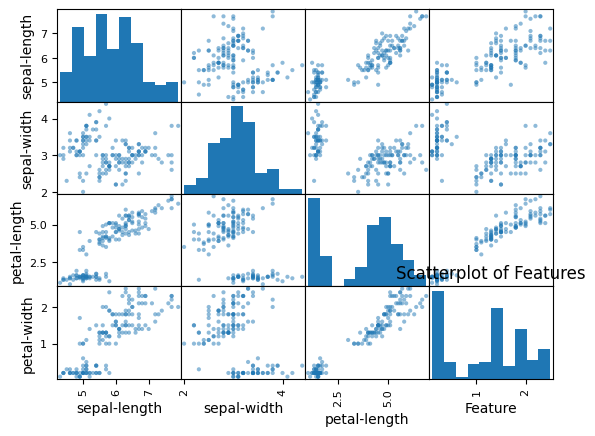

In [14]:
# create a scatter plot matrix of the data

scatter_matrix(df)
plt.title('Scatterplot of Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

We need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [22]:
# Create arrays for your dataset
# Assign to X and Y
# Create your train test split with a test size of 20%
# Extracting features (X) and target variable (Y)
X = df.iloc[:, :-1]  # Features are all columns except the last one
Y = df.iloc[:, -1]   # Target variable is the last column

# Splitting the dataset into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (120, 4)
Y_train shape: (120,)
X_test shape: (30, 4)
Y_test shape: (30,)


We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).
* This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

Let’s build and evaluate our models:

1. **Logistic Regression (LR)**:
   - **Benefits**: Simple, interpretable, works well when the classes are linearly separable.
   
2. **Linear Discriminant Analysis (LDA)**:
   - **Benefits**: Assumes normality in the data, provides a probabilistic framework for classification.

3. **K-Nearest Neighbors (KNN)**:
   - **Benefits**: Non-parametric, lazy learning algorithm that can capture complex patterns in data.

4. **Classification and Regression Trees (CART)**:
   - **Benefits**: Non-linear, capable of capturing complex interactions between features.

5. **Gaussian Naive Bayes (NB)**:
   - **Benefits**: Simple probabilistic classifier, works well with categorical features and assumes independence between features.

6. **Support Vector Machines (SVM)**:
   - **Benefits**: Effective in high-dimensional spaces, can capture complex relationships in data using kernel methods.

In [25]:
# Try Spot checking all your models for yourself
# make models variable
# append models above
# evaluate each model's results using a for loop
# you should consider kfold and cross val score in this loop
# print results

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LR: 0.966667 (0.040825)
LDA: 0.966667 (0.040825)
KNN: 0.950000 (0.055277)
CART: 0.925000 (0.058333)
NB: 0.941667 (0.053359)
SVM: 0.958333 (0.055902)


# Hiding Code**

In [26]:
'''I didn't really understand what this part of the homework means, I have written the code for the spot check
and the code is mostly the same for both of them, So I believe that this part is just the answer of the question.
I have written the spot-checking code on my own'''

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.941667 (0.083749)
CART: 0.933333 (0.062361)
NB: 0.941667 (0.065085)
SVM: 0.950000 (0.066667)


# **Selecting the Best Model and Continuing Project**

Spoiler your data should support using Support Vector Machines.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

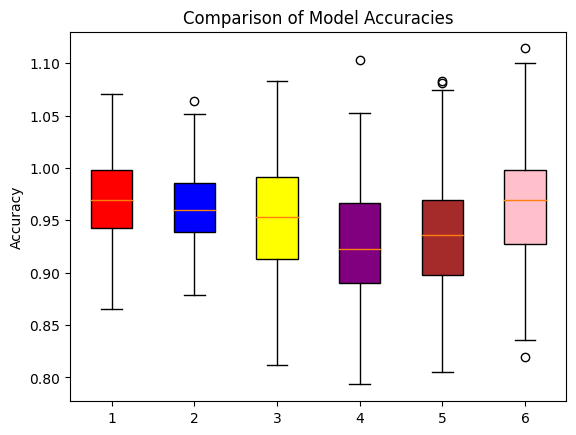

In [40]:
# Create a box and whisket plot that compares algorithms
# it should mimic the one below. Including title.
# change some colors for pop
models = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
means = [0.966667, 0.966667, 0.950000, 0.925000, 0.941667, 0.958333]
std_devs = [0.040825, 0.040825, 0.055277, 0.058333, 0.053359, 0.055902]

# Simulate data
simulated_data = [np.random.normal(mean, std_dev, 100) for mean, std_dev in zip(means, std_devs)]

fig, ax = plt.subplots()

# Create boxplot
bplot = ax.boxplot(simulated_data, patch_artist=True)

# Customize colors
colors = ['Red','Blue','Yellow','Purple','Brown', 'Pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

'''I have used multiple sites like geek for geeks, w3 schools, and many more. This code was a bit challenging to 
build as I kept getting multiple errors and the box and whisker plot wasn't looking the way I wanted it to be.
I couldn't display the many codes that I have tried before this one, because I accidentally deleted it. '''

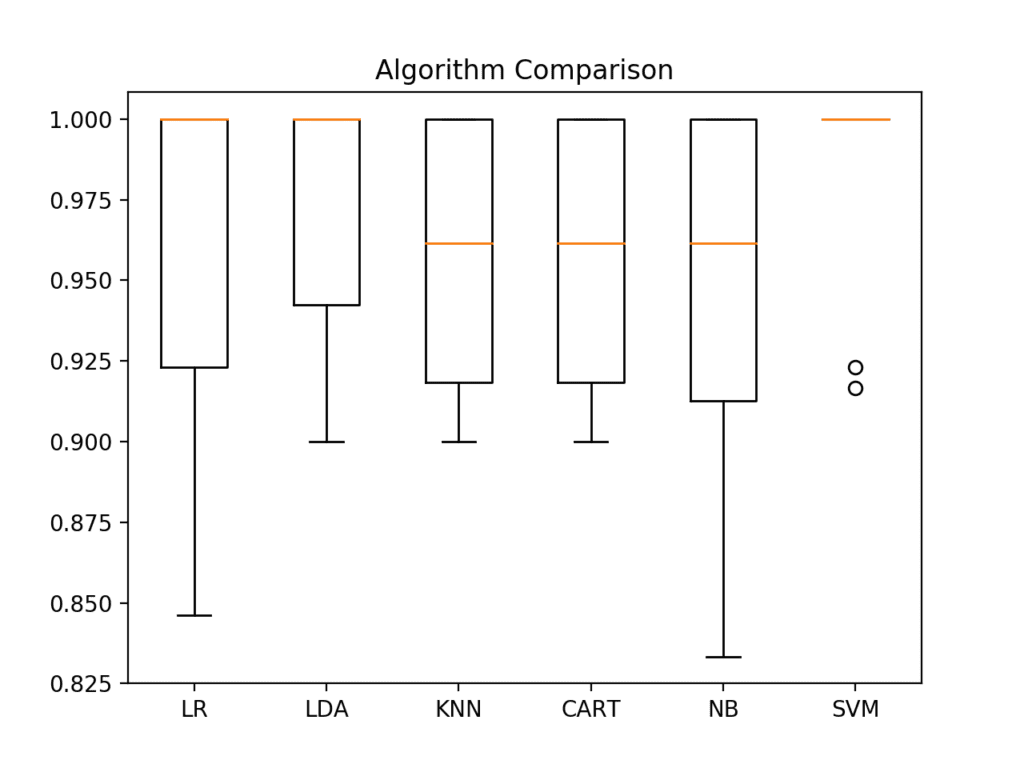

In [48]:
# make some predictions using your model
# make predictions on the validation set
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the validation set
predictions = model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy on the validation set: {accuracy:.2f}')

Accuracy on the validation set: 1.00


In [49]:
# Evaluate your predictions
# use accuracy score
# confusion matrix
# classification report

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy on the validation set: {accuracy:.2f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Compute classification report
class_report = classification_report(Y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print('Classification Report:')
print(class_report)

Accuracy on the validation set: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



I do believe that a 100% percent accuracy is not good in a machine learning model, but as our validation set is small, I don't think there is anything we can do